## Calorimeter GAN test
### Author: stephen.menary@manchester.ac.uk

---

### Step 1)  Grab a dataset of rings labelled by momentum

---

In [1]:
#  Create simulated dataset of rings and showers
#  -  datapoints are labelled by momentum

import importlib
import Tools.shower_test_tools as tools
tools = importlib.reload(tools)

import numpy as np

num_pixels      = 28
num_simulations = 10000

TRAIN_X, TRAIN_Y, VAL_X, VAL_Y, TEST_X, TEST_Y = tools.get_rings_or_showers_with_coordinates(
    rings=True,
    showers=False,
    do_x=False, 
    do_y=False, 
    do_p=True, 
    num_pixels=num_pixels, 
    num_simulations=num_simulations,
    tag="shower_tests_4_ring")

X_Rings = np.concatenate([TRAIN_X, VAL_X, TEST_X])

print(f"   RING DATASET with size {len(X_Rings)}")

'''X1_Shower, Y1_Shower, X2_Shower, Y2_Shower, X3_Shower, Y3_Shower = tools.get_rings_or_showers_with_coordinates(
    rings=False,
    showers=True,
    do_x=False, 
    do_y=False, 
    do_p=True, 
    num_pixels=num_pixels, 
    num_simulations=num_simulations,
    tag="shower_tests_4_shower")

X_Shower = np.concatenate([X1_Shower, X2_Shower, X3_Shower])

print(f"   SHOWER DATASET with size {len(X_Shower)}")'''

10000 rings loaded successfully from file
   RING DATASET with size 10000


'X1_Shower, Y1_Shower, X2_Shower, Y2_Shower, X3_Shower, Y3_Shower = tools.get_rings_or_showers_with_coordinates(\n    rings=False,\n    showers=True,\n    do_x=False, \n    do_y=False, \n    do_p=True, \n    num_pixels=num_pixels, \n    num_simulations=num_simulations,\n    tag="shower_tests_4_shower")\n\nX_Shower = np.concatenate([X1_Shower, X2_Shower, X3_Shower])\n\nprint(f"   SHOWER DATASET with size {len(X_Shower)}")'

---

### Step 2)  Plot some examples of our images

---

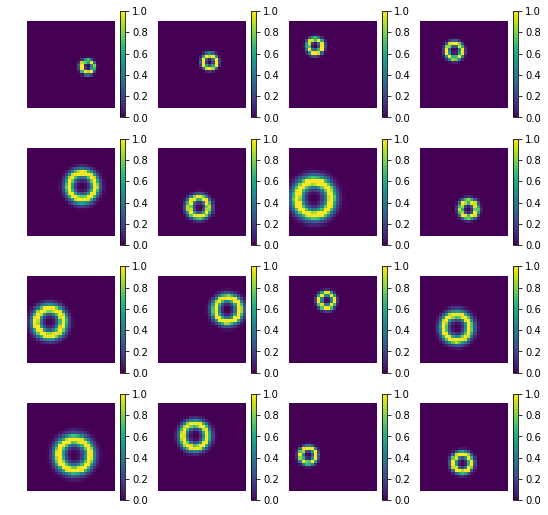

In [2]:
#  Plot some examples of datapoints
#

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,9))
for idx, im in enumerate(X_Shower[:16]) :
    plt.subplot(4, 4, 1+idx)
    plt.imshow(im[:,:,0], vmin=0., vmax=1.)
    plt.colorbar()
    plt.axis('off')
plt.show()


---

### Step 3)  Create CNN discriminator, MLP generator and GAN

---

In [3]:
#  Create networks
#

from keras.layers     import Dense, Flatten, Conv2D, Input, Reshape, LeakyReLU, Dropout, Activation, BatchNormalization, UpSampling2D, Conv2DTranspose
from keras.models     import Model, Sequential
from keras.optimizers import Adam
from tensorflow import reshape


'''def create_discriminator_network () :
    model = Sequential(name="Discriminator")
    model.add(Conv2D(10, kernel_size=(2,2), activation="sigmoid", input_shape=(num_pixels, num_pixels, 1)))
    model.add(Conv2D(10, kernel_size=(3,3), activation="sigmoid"))
    model.add(Conv2D(10, kernel_size=(3,3), activation="sigmoid"))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy")
    model.summary()
    return model'''

'''def create_discriminator_network () :
    model = Sequential(name="Discriminator")
    model.add(Flatten(input_shape=(num_pixels, num_pixels, 1)))
    model.add(Dense(256 , activation="relu"))
    model.add(Dense(512 , activation="relu"))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(2   , activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy")
    model.summary()
    return model'''

'''def create_discriminator_network():
    discriminator=Sequential()
    discriminator.add(Flatten(input_shape=(num_pixels, num_pixels, 1)))
    discriminator.add(Dense(1024))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer="adam")
    return discriminator'''

def create_discriminator_network () :
    model = Sequential(name="Discriminator")
    model.add(Conv2D(12, kernel_size=(3,3), activation="relu", input_shape=(num_pixels, num_pixels, 1)))
    model.add(Dropout(0.3))
    model.add(Conv2D(8, kernel_size=(3,3), activation="relu"))
    model.add(Dropout(0.3))
    model.add(Conv2D(8, kernel_size=(3,3), activation="relu"))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation="sigmoid"))
    adam = Adam()
    model.compile(optimizer=adam, loss="binary_crossentropy", metrics=["accuracy"])
    return model

'''def create_discriminator_network () :
    model = Sequential(name="Discriminator")
    model.add(Flatten(input_shape=(num_pixels, num_pixels, 1)))
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(1024, activation="relu"))
    model.add(Dense(1   , activation="sigmoid"))
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model'''

'''def create_generator_network () :
    model = Sequential(name="Generator")
    model.add(Dense(64 , activation="sigmoid", input_shape=(n_input_size,)))
    model.add(Dense(128 , activation="sigmoid"))
    model.add(Dense(256, activation="sigmoid"))
    model.add(Dense(num_pixels*num_pixels, activation="relu"))
    model.add(Reshape(target_shape=(num_pixels, num_pixels, 1)))
    model.compile(optimizer="adam", loss="categorical_crossentropy")
    model.summary()
    return model'''

'''def create_generator_network():
    generator=Sequential()
    generator.add(Dense(units=256,input_shape=(100,)))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    generator.add(Dense(units=num_pixels*num_pixels, activation='relu'))
    generator.add(Reshape(target_shape=(num_pixels, num_pixels, 1)))
    generator.compile(loss='binary_crossentropy', optimizer="adam")
    return generator'''

def create_generator_network () :
    model = Sequential(name="Generator")
    model.add(Dense(500, activation="relu", input_shape=(n_input_size,)))
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Dense(1000, activation="relu"))
    model.add(Dropout(0.3))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Dense(1000, activation="relu"))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Dense(1800, activation="relu"))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Dense(num_pixels*num_pixels, activation="sigmoid"))
    model.add(Reshape(target_shape=(num_pixels, num_pixels, 1)))
    return model

'''def create_gan(d, g):
    d.trainable = False
    gan_input   = Input(shape=(n_input_size,))
    x           = g(gan_input)
    gan_output  = d(x)
    gan         = Model(inputs=gan_input, outputs=gan_output, name="GAN")
    gan.compile (loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
    return gan'''


n_input_size = 100


'''def create_discriminator_network () :
    model = Sequential(name="Discriminator")
    depth, dropout = 64, 0.4
    model.add(Conv2D(depth*1, 5, strides=2, input_shape=(num_pixels, num_pixels, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))
    model.add(Conv2D(depth*2, 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))
    model.add(Conv2D(depth*4, 5, strides=2, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))
    model.add(Conv2D(depth*8, 5, strides=1, padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
    return model'''

'''def create_generator_network () :
    model = Sequential(name="Generator")
    depth, dropout, dim = 256, 0.4, int(num_pixels/4)
    model.add(Dense(dim*dim*depth, input_dim=n_input_size))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Reshape((dim, dim, depth)))
    model.add(Dropout(dropout))
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/2), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(UpSampling2D())
    model.add(Conv2DTranspose(int(depth/4), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Conv2DTranspose(int(depth/8), 5, padding='same'))
    model.add(BatchNormalization(momentum=0.9))
    model.add(Activation('relu'))
    model.add(Conv2DTranspose(1, 5, padding='same'))
    model.add(Activation('sigmoid'))
    return model'''

def create_gan(d, g):
    d.trainable = False
    gan = Sequential(name="GAN")
    gan.add(g)
    gan.add(d)
    adam = Adam()
    gan.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return gan

discriminator = create_discriminator_network()
discriminator.summary()

generator     = create_generator_network()
generator    .summary()

gan           = create_gan(discriminator, generator)
gan          .summary()

def replace_discriminator () :
    global discriminator, generator, gan
    discriminator = create_discriminator_network()
    gan = create_gan(discriminator, generator)
    return gan

def replace_generator () :
    global discriminator, generator, gan
    generator = create_generator_network()
    gan = create_gan(discriminator, generator)
    return gan

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Model: "Discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 12)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         872       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 8)         584       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_______________________________________________

## Step ) Pre-train the discriminator

In [ ]:
'''from keras.callbacks import EarlyStopping

n_showers = int(TRAIN_X.shape[0]/2)
Pretrain_fake = np.concatenate([X1_Shower[:n_showers,:,:,:],
                generator.predict(np.random.normal(0, 1, size=(num_simulations-n_showers, n_input_size)))])
Pretrain_X = np.concatenate([TRAIN_X, Pretrain_fake])
Pretrain_Y = np.concatenate([np.ones(TRAIN_X.shape[0]), np.zeros(Pretrain_fake.shape[0])])

Val_n_showers = int(VAL_X.shape[0]/2)
Val_Pretrain_fake = np.concatenate([X2_Shower[:n_showers,:,:,:],
                    generator.predict(np.random.normal(0, 1, size=(num_simulations-n_showers, n_input_size)))])
Val_Pretrain_X = np.concatenate([VAL_X, Val_Pretrain_fake])
Val_Pretrain_Y = np.concatenate([np.ones(VAL_X.shape[0]), np.zeros(Val_Pretrain_fake.shape[0])])

discriminator.fit(Pretrain_X,
                  Pretrain_Y,
                  validation_data=(Val_Pretrain_X, Val_Pretrain_Y),
                  callbacks=[EarlyStopping(monitor="val_accuracy", restore_best_weights=True, patience=5)],
                  epochs=1000
                  )'''

In [ ]:
'''gan_val_noise  = np.random.normal(0, 1, size=(2*n_showers, n_input_size))
gan_val_labels = np.array([1 for i in range(2*n_showers)])

replace_generator()

gan.fit(gan_val_noise,
        gan_val_labels,
        callbacks=[EarlyStopping(monitor="accuracy", restore_best_weights=True, patience=5)],
        epochs=1000
        )'''

---

### Step 4)  Train the network

---

In [ ]:
#  Fit the training data
#  - using early stopping, and storing best solution
#

import sys


def plot_epoch (e, noise, generated_images, image_batch) :
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(121)
    plt.imshow(noise[0,:].reshape(int(np.sqrt(n_input_size)), int(np.sqrt(n_input_size))),)
    plt.title(f"Input noise (epoch {e})")
    plt.colorbar()
    ax = fig.add_subplot(122)
    plt.imshow(generated_images[0,:,:,0], vmin=0., vmax=1.)
    plt.title(f"Generated image (epoch {e})")
    plt.colorbar()
    plt.show()
    
    fig = plt.figure(figsize=(10,10))
    for idx in range(1, 10) :
        ax = fig.add_subplot(330+idx)
        if idx % 3 != 0 : image, label = generated_images[idx-1:idx,:,:,:], "Generated"
        else            : image, label = image_batch     [idx-1:idx,:,:,:], "Truth"
        plt.imshow(image[0,:,:,0], vmin=0., vmax=1.)
        plt.title(f"{label} (D={discriminator.predict(image)[0][0]:.2f})")
        ax.axis("off")
    plt.show()

def training(epochs=1, batch_size=128):
    for e in range(epochs):
        print(f"Epoch {e}")
        
        noise            = np.random.uniform(-1., 1., size=(batch_size, n_input_size))
        generated_images = generator.predict(noise)
        image_batch      = X_Rings[np.random.randint(low=0, high=X_Rings.shape[0], size=batch_size)]
            
        X      = np.concatenate([image_batch, generated_images])
        y_real = np.array([0. for i in range(batch_size)])
        y_gen  = np.array([0. for i in range(batch_size)])
        y_fake = np.array([1. for i in range(batch_size)])
        y_true = np.concatenate([y_real, y_fake])
            
        if e % 10 == 0 :
            print(f"Epoch {e}: Discriminator accuracy is {100.*discriminator.evaluate(X, y_true, verbose=0)[1]:.0f}%")
            print(f"Epoch {e}: GAN           accuracy is {100.*discriminator.evaluate(generated_images, y_gen, verbose=0)[1]:.0f}%")
            plot_epoch(e, noise, generated_images, image_batch)
            
        #Pre train discriminator on  fake and real data  before starting the gan.
        discriminator.trainable=True
        dis_loss, dis_acc = discriminator.train_on_batch(X, y_true)
        
        disc_idx = 0
        while (disc_idx < 10) and (dis_acc < 0.7) :
            print(f"Epoch {e}: improving Discriminator (attempt {disc_idx+1}) with accuracy of {100.*dis_acc:.0f}%".ljust(80))
            dis_loss, dis_acc = discriminator.train_on_batch(X, y_true)
            disc_idx = disc_idx + 1
        '''if disc_idx > 99 and dis_acc < 1e-5 :
            print("-- Replacing discriminator --")
            replace_discriminator()'''
            
        # During the training of gan, the weights of discriminator should be fixed. 
        discriminator.trainable=False
        noise             = np.random.normal(0, 1, size=(batch_size, n_input_size))
        gen_loss, gen_acc = gan.train_on_batch(noise, y_gen)
        
        '''gan_idx = 0
        while gan_idx < 2 and (gen_acc < 0.02) :
            print(f"Epoch {e}: improving Generator     (attempt {gan_idx+1}) with accuracy of {100.*gen_acc:.0f}%".ljust(80))
            gen_loss, gen_acc = gan.train_on_batch(noise, y_gen)
            gan_idx = gan_idx + 1'''
        '''if gan_idx > 99 and gen_acc < 1e-5 :
            print("-- Replacing generator --")
            gan = replace_generator()'''
            
            
training(4000, 400)


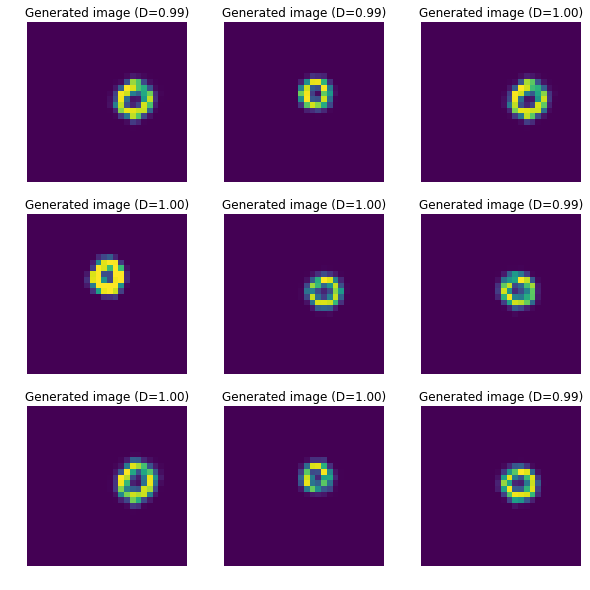

In [9]:
plot_noise            = np.random.uniform(-1., 1., size=(9, n_input_size))
plot_image_batch      = X_Rings[np.random.randint(low=0, high=X_Rings.shape[0], size=9)]
        
fig = plt.figure(figsize=(10,10))
for idx in range(1, 10) :
    ax = fig.add_subplot(330+idx)
    image = plot_generated_images[idx-1:idx,:,:,:]
    plt.imshow(image[0,:,:,0], vmin=0., vmax=1.)
    plt.title(f"Generated image (D={discriminator.predict(image)[0][0]:.2f})")
    ax.axis("off")
plt.show()